In [1]:
import numpy as np
import pandas as pd

In [2]:
pheno_infname = '../base332.txt'

in_data_df = pd.read_csv(pheno_infname, sep='\t', dtype={'HospitalID': str})
print(in_data_df.shape)
in_data_df.head()

(332, 77)


,HDSampleID,SampleName,HospitalID,UMC,UMC2,ManualSevereType,Severity,SysSevereType,LastTimeOfSysSevereType,Gender,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,D2002002751,1,0000223383,1.0,1,Moderate,A,2.0,2020-02-12,1,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,D2002002752,2,0000223107,0.0,0,Moderate,A,2.0,2020-01-23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,D2002002753,3,0000222709,1.0,"1,5",Severe,B,NaN,NaN,2,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,D2002002754,4,0000222995,1.0,5,Critical,B,4.0,2020-02-16,1,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,D2002002755,5,0000223113,0.0,0,Moderate,A,2.0,2020-01-27,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [3]:
in_data_df['ManualSevereType'].value_counts()

Moderate        225
Severe           53
Asymptomatic     25
Critical         17
Mild             12
Name: ManualSevereType, dtype: int64

In [4]:
in_data_df.describe()

,UMC,SysSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,U/C,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,PCT
count,328.000000,305.000000,332.000000,332.000000,323.000000,332.000000,323.000000,313.000000,316.000000,327.000000,...,212.000000,212.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,318.000000
mean,0.442073,2.078689,1.530120,46.338133,137.588235,1.438524,189.746130,4.620319,4.950475,35.758104,...,66.693396,4.099387,65.649077,1046.907749,37.405904,590.760148,1.798672,24.062362,384.859779,0.200692
std,0.497392,0.538368,0.499845,17.299887,15.195030,0.722002,60.448612,0.517683,1.956594,5.767801,...,25.001437,1.499177,10.949080,575.164082,8.444404,329.641609,0.916789,8.381677,238.427057,0.060665
min,0.000000,1.000000,1.000000,1.750000,84.000000,0.160000,23.000000,2.670000,1.560000,22.000000,...,31.330000,1.720000,29.800000,93.000000,14.400000,58.000000,0.360000,4.800000,33.000000,0.030000
25%,0.000000,2.000000,1.000000,35.000000,127.000000,0.990000,145.000000,4.250000,3.640000,32.450000,...,50.042500,3.180000,58.800000,629.500000,32.000000,386.500000,1.210000,18.250000,203.000000,0.160000
50%,0.000000,2.000000,2.000000,49.000000,137.000000,1.275000,183.000000,4.610000,4.590000,35.200000,...,61.900000,3.865000,67.200000,974.000000,37.800000,536.000000,1.670000,23.100000,350.000000,0.190000
75%,1.000000,2.000000,2.000000,61.000000,146.000000,1.742500,225.000000,4.930000,5.652500,38.650000,...,75.892500,4.725000,73.050000,1338.500000,42.100000,737.000000,2.160000,28.600000,519.500000,0.240000
max,1.000000,4.000000,2.000000,86.000000,186.000000,6.870000,376.000000,6.610000,16.660000,84.900000,...,241.920000,14.120000,88.200000,4552.000000,61.900000,2626.000000,7.830000,56.800000,1685.000000,0.440000


In [5]:

col_name = list(in_data_df.columns)
unwant_col = ['HDSampleID', 'SampleName', 'Severity', 'SysSevereType', 
              'LastTimeOfSysSevereType', 'UMC2', 'Nationality', 'Hometown']
fisrt_labs_f = np.array([x for x in col_name if x not in unwant_col])
print(fisrt_labs_f)
print(len(fisrt_labs_f))

['HospitalID' 'UMC' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT'
 'RBC' 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' '5NT' 'ALP' 'Ca*Pi' 'Ca++'
 'CHE' 'CL' 'GGT' 'K' 'LDH' 'MAO' 'Mg' 'Na' 'Pi-' 'A/G' 'ALB' 'ALT' 'AST'
 'AST/ALT' 'Bc-TR' 'DB' 'GLO' 'ID' 'm-AST' 'PA' 'TB' 'TBA' 'TP' 'FIO2'
 'Lac' 'LACT' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CHOL' 'CO2' 'Cr' 'CRP' 'eGFR'
 'HDL' 'LDL' 'TG' 'U/C' 'Urea' 'T-CELL' 'Tc-Count' 'Th-Cell' 'Th-Count'
 'TH/TS' 'Ts-Cell' 'Ts-Count' 'IL6' 'PCT']
69


In [6]:
sel_data_df = in_data_df[fisrt_labs_f].copy()

In [7]:
sel_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 69 columns):
HospitalID          332 non-null object
UMC                 328 non-null float64
ManualSevereType    332 non-null object
Gender              332 non-null int64
Age                 332 non-null float64
HGB                 323 non-null float64
LYMPH#              332 non-null float64
PLT                 323 non-null float64
RBC                 313 non-null float64
WBC                 316 non-null float64
APTT                327 non-null float64
D-DIC               321 non-null object
FIB                 327 non-null float64
PT                  327 non-null float64
TT                  327 non-null float64
5NT                 130 non-null float64
ALP                 130 non-null float64
Ca*Pi               118 non-null float64
Ca++                94 non-null float64
CHE                 219 non-null float64
CL                  223 non-null float64
GGT                 325 non-null object


In [8]:
# find columns being string data type
col_inx_has_str = [idx for idx,x in enumerate(sel_data_df.dtypes) if x != 'float64' and idx > 3 ]

# get the string-type column name
fisrt_labs_f[col_inx_has_str]

array(['D-DIC', 'GGT', 'ALT', 'CRP', 'IL6'], dtype='<U16')

In [9]:
# string data processing

# extract float value
float_regex = r'([+-]?\d+\.\d+|\d+)'
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].str.extract(float_regex, expand=False)
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].astype(float)

sel_data_df['GGT'] = sel_data_df['GGT'].str.extract(float_regex, expand=False)
sel_data_df['GGT'] = sel_data_df['GGT'].astype(float)

sel_data_df['ALT'] = sel_data_df['ALT'].str.extract(float_regex, expand=False)
sel_data_df['ALT'] = sel_data_df['ALT'].astype(float)

sel_data_df['CRP'] = sel_data_df['CRP'].str.extract(float_regex, expand=False)
sel_data_df['CRP'] = sel_data_df['CRP'].astype(float)

sel_data_df['IL6'] = sel_data_df['IL6'].str.extract(float_regex, expand=False)
sel_data_df['IL6'] = sel_data_df['IL6'].astype(float)



In [10]:
# calculate the nan counts for each column
dd = pd.DataFrame(sel_data_df.isnull().sum())
dd

,0
HospitalID,0
UMC,4
ManualSevereType,0
Gender,0
Age,0
...,...
TH/TS,61
Ts-Cell,61
Ts-Count,61
IL6,165


In [11]:
# find columns having nan values (the number of nan > rate*len(df))
rate = 0.5
col_inx_has_nan = [idx for idx,x in enumerate(sel_data_df.isnull().sum()) if x > rate * len(sel_data_df)]

# get the filter-out columns
print(len(fisrt_labs_f[col_inx_has_nan]))
fisrt_labs_f[col_inx_has_nan]

15


array(['5NT', 'ALP', 'Ca*Pi', 'Ca++', 'MAO', 'Mg', 'Pi-', 'Bc-TR',
       'm-AST', 'PA', 'LACT', 'CHOL', 'HDL', 'LDL', 'TG'], dtype='<U16')

In [12]:
# get the remain columns
remain_col_inx = list(set(range(len(fisrt_labs_f))) - set(col_inx_has_nan))
remain_col_inx.sort()
print(len(remain_col_inx))
final_colnames = fisrt_labs_f[remain_col_inx]
print(final_colnames)

# obtain the final datafram
final_data_df = sel_data_df[final_colnames].copy()

final_data_df.head()

54
['HospitalID' 'UMC' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT'
 'RBC' 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' 'CHE' 'CL' 'GGT' 'K' 'LDH'
 'Na' 'A/G' 'ALB' 'ALT' 'AST' 'AST/ALT' 'DB' 'GLO' 'ID' 'TB' 'TBA' 'TP'
 'FIO2' 'Lac' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CO2' 'Cr' 'CRP' 'eGFR' 'U/C'
 'Urea' 'T-CELL' 'Tc-Count' 'Th-Cell' 'Th-Count' 'TH/TS' 'Ts-Cell'
 'Ts-Count' 'IL6' 'PCT']


,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,1.0,Moderate,1,51.0,158.0,0.99,156.0,5.15,3.53,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,0.0,Moderate,1,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,1.0,Severe,2,65.0,122.0,0.88,161.0,3.96,4.31,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,1.0,Critical,1,63.0,170.0,0.31,119.0,5.64,6.79,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,0.0,Moderate,1,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [13]:
final_colnames

array(['HospitalID', 'UMC', 'ManualSevereType', 'Gender', 'Age', 'HGB',
       'LYMPH#', 'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC', 'FIB', 'PT', 'TT',
       'CHE', 'CL', 'GGT', 'K', 'LDH', 'Na', 'A/G', 'ALB', 'ALT', 'AST',
       'AST/ALT', 'DB', 'GLO', 'ID', 'TB', 'TBA', 'TP', 'FIO2', 'Lac',
       'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CO2', 'Cr', 'CRP', 'eGFR',
       'U/C', 'Urea', 'T-CELL', 'Tc-Count', 'Th-Cell', 'Th-Count',
       'TH/TS', 'Ts-Cell', 'Ts-Count', 'IL6', 'PCT'], dtype='<U16')

In [14]:
final_data_df.shape

(332, 54)

In [15]:
final_data_df['ManualSevereType'].value_counts()

Moderate        225
Severe           53
Asymptomatic     25
Critical         17
Mild             12
Name: ManualSevereType, dtype: int64

In [16]:
# convert Severity into ordinary value
ord_val = {'Asymptomatic': 1,'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Critical': 5}       

final_data_df['Label'] = final_data_df['ManualSevereType'].apply(lambda x: ord_val[x])
final_data_df['Gender']=final_data_df['Gender']-1
final_data_df.head()

,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT,Label
0,0000223383,1.0,Moderate,0,51.0,158.0,0.99,156.0,5.15,3.53,...,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16,3
1,0000223107,0.0,Moderate,0,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22,3
2,0000222709,1.0,Severe,1,65.0,122.0,0.88,161.0,3.96,4.31,...,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16,4
3,0000222995,1.0,Critical,0,63.0,170.0,0.31,119.0,5.64,6.79,...,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12,5
4,0000223113,0.0,Moderate,0,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25,3


# Create dataset for training

In [17]:
y = final_data_df['Label'].values
X_df = final_data_df.drop(columns=['HospitalID', 'ManualSevereType', 'Label']).copy()
X_col_name = list(X_df.columns)
X = X_df.values

# Missing value impute

install missingpy
https://pypi.org/project/missingpy/


In [18]:
# 不做imputation
# from missingpy import MissForest

# imputer = MissForest(random_state=1337)
# X_imped = imputer.fit_transform(X)

In [19]:
# # normalization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_imped_norm = scaler.fit_transform(X_imped)

# # X_df_imped_norm = pd.DataFrame(X_imped_norm, columns=X_col_name) # XGB可以不用作normalization

# X_df_imped_norm = pd.DataFrame(X_imped, columns=X_col_name)
# X_df_imped_norm.head()

# Using Xgb as ordinary regression

In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# data_dmatrix = xgb.DMatrix(data=X_df_imped_norm,label=y)
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.5,
          'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.524444,0.017772,1.548483,0.071964
1,0.987384,0.023688,1.050100,0.067201
2,0.746366,0.031012,0.840483,0.045768
3,0.624668,0.036426,0.762999,0.035974
4,0.555134,0.023296,0.727010,0.047283


In [22]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.524444,0.017772,1.548483,0.071964
1,0.987384,0.023688,1.050100,0.067201
2,0.746366,0.031012,0.840483,0.045768
3,0.624668,0.036426,0.762999,0.035974
4,0.555134,0.023296,0.727010,0.047283
5,0.518349,0.010684,0.709743,0.045401
6,0.493827,0.006931,0.697627,0.041131
7,0.476550,0.003324,0.692790,0.048839
8,0.462803,0.003882,0.688940,0.047511
9,0.452454,0.000729,0.686820,0.049219


In [23]:
print((cv_results["test-rmse-mean"]).tail(1))

13    0.683832
Name: test-rmse-mean, dtype: float64


In [24]:
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [10, 20]
# plt.show()

from xgboost import XGBRegressor 
xg_reg = XGBRegressor(**params)
# xg_reg.fit(X_df_imped_norm, y)
xg_reg.fit(pd.DataFrame(X, columns=X_col_name), y)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

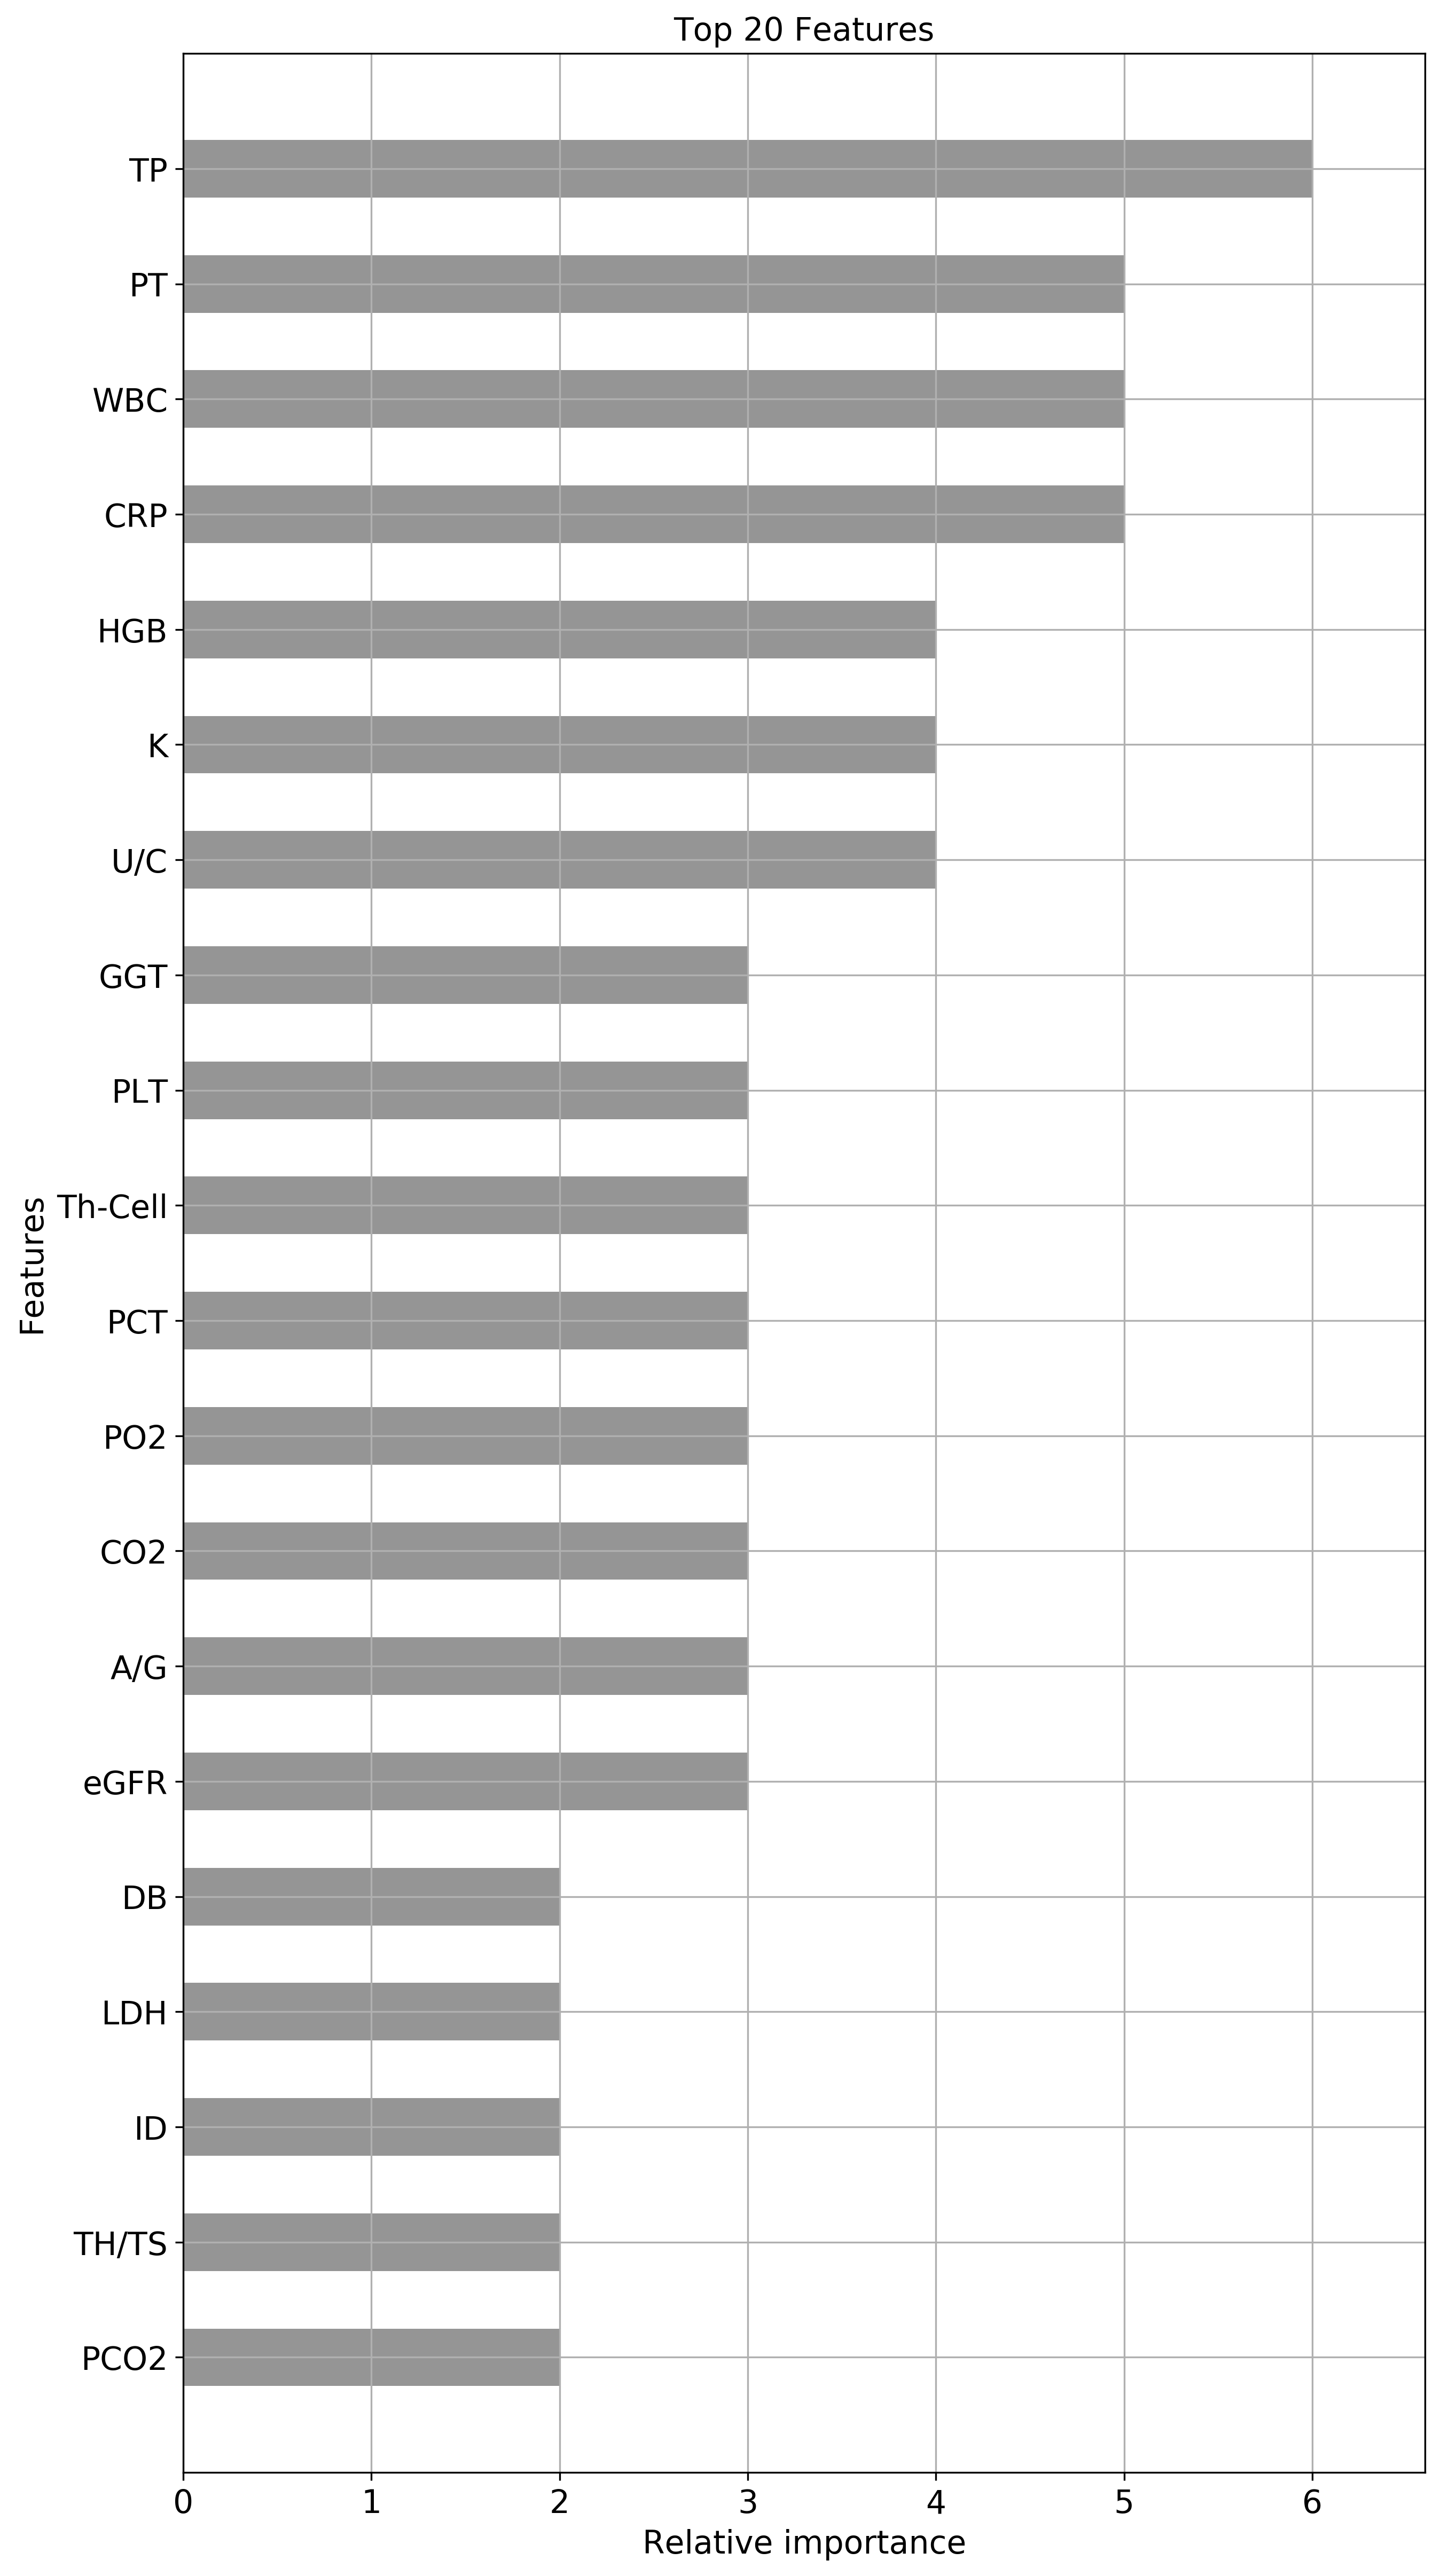

In [26]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 20]

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots(dpi=300)
xgb.plot_importance(xg_reg, importance_type='weight', ax = ax,
                    max_num_features=20, xlabel='Relative importance', height=0.5,
                    show_values=False,  title='Top 20 Features', color='#959595')


# Feature selection based on feature importance

In [28]:
feat_imp = xg_reg.feature_importances_

In [29]:
feat_imp

array([0.        , 0.        , 0.02239938, 0.00527963, 0.01023647,
       0.00360561, 0.00871375, 0.00377479, 0.01046515, 0.00060926,
       0.01073781, 0.0052959 , 0.02631444, 0.01155578, 0.00500471,
       0.00336555, 0.00606616, 0.00316949, 0.02790642, 0.05346942,
       0.00634018, 0.01415607, 0.        , 0.00235473, 0.00127491,
       0.        , 0.00412618, 0.01369504, 0.00357307, 0.00964501,
       0.        , 0.04530453, 0.00641319, 0.0092413 , 0.00568267,
       0.02253046, 0.01689994, 0.01609796, 0.00061157, 0.04924865,
       0.16495709, 0.01291858, 0.00086857, 0.012237  , 0.01968892,
       0.00483255, 0.        , 0.00214245, 0.00734753, 0.09722997,
       0.2306868 , 0.0019254 ], dtype=float32)

# Prediction

In [30]:
y_pred = xg_reg.predict(pd.DataFrame(X, columns=X_col_name))
# y_pred_adj = np.array([1 if x < 1 else 5 if x > 5 else x for x in y_pred ])
y_pred_adj = y_pred
y_pred_adj_lab = np.round(y_pred_adj)

In [31]:
min(y_pred)

0.7057963

In [32]:
pred_df = pd.DataFrame(data={'HospitalID': final_data_df['HospitalID'].values,
                            'ManualSevereType': final_data_df['ManualSevereType'].values,
                            #'Y_true': final_data_df['Label'].values,
                            'Score': y_pred_adj,
                            #'Y_pred_label': y_pred_adj_lab
                            })

In [33]:
pred_df

,HospitalID,ManualSevereType,Score
0,0000223383,Moderate,2.699539
1,0000223107,Moderate,2.840362
2,0000222709,Severe,3.765182
3,0000222995,Critical,4.187864
4,0000223113,Moderate,2.389731
...,...,...,...
327,0000223919,Moderate,3.394386
328,0000224070,Asymptomatic,1.074546
329,0000223966,Moderate,2.853092
330,0000223858,Asymptomatic,2.524923


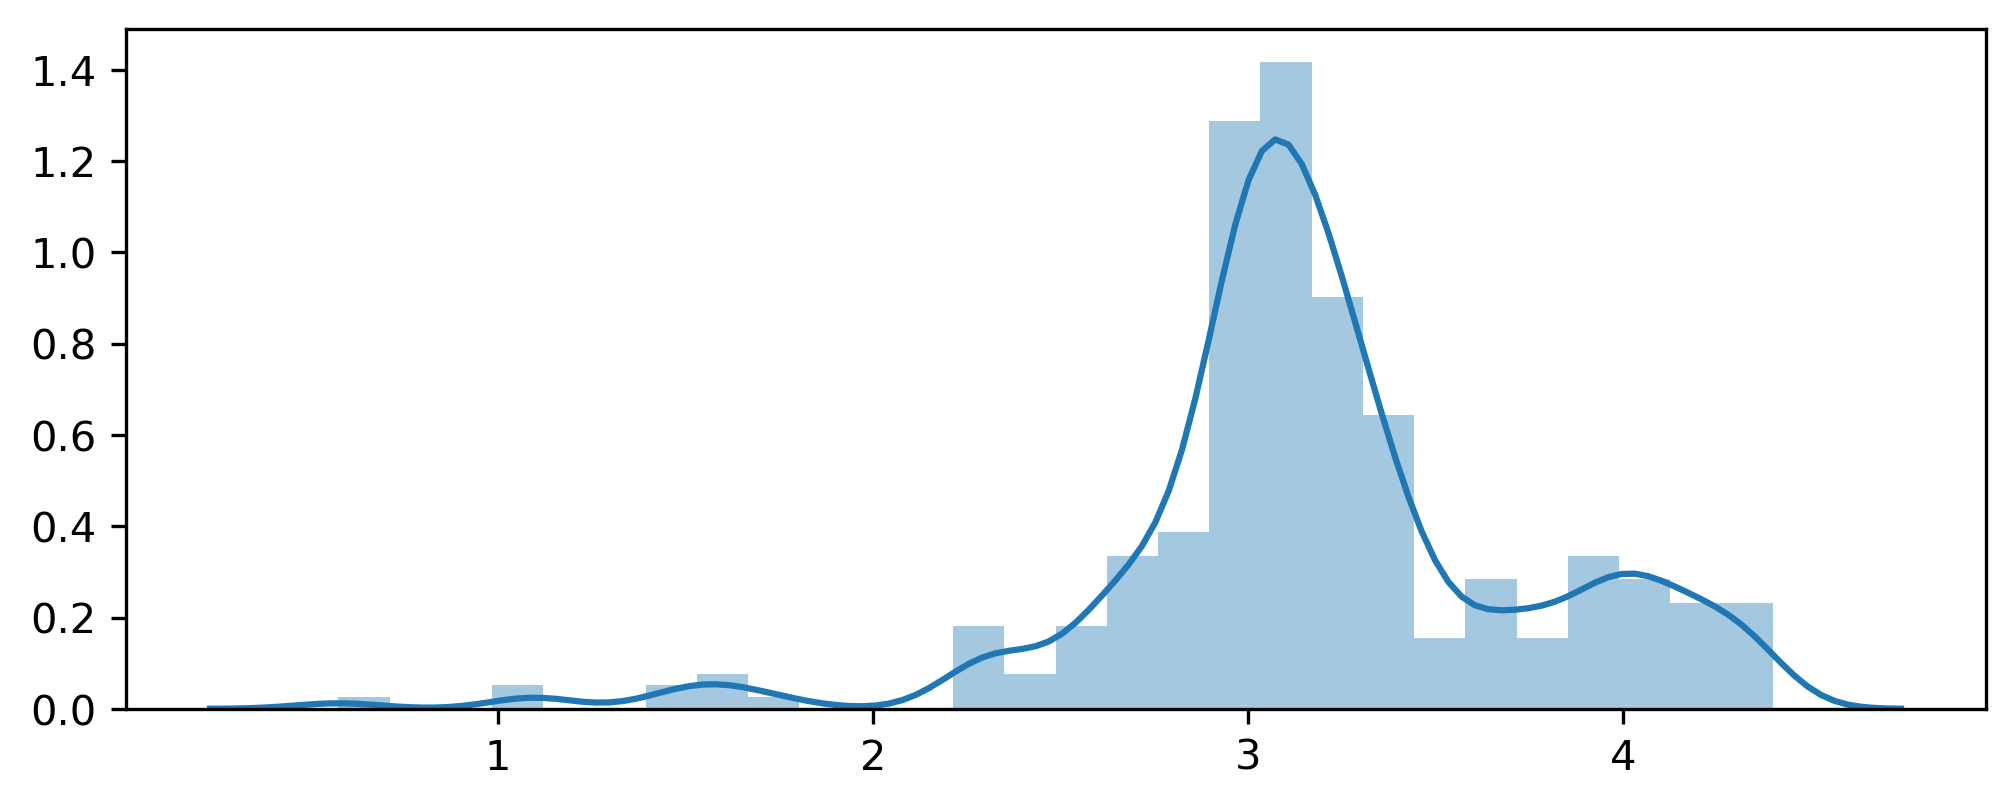

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8, 3), dpi=300)
sns.distplot(pred_df['Score'].values, kde=True,ax=ax)
# plt.hist(pred_df['Score'].values)


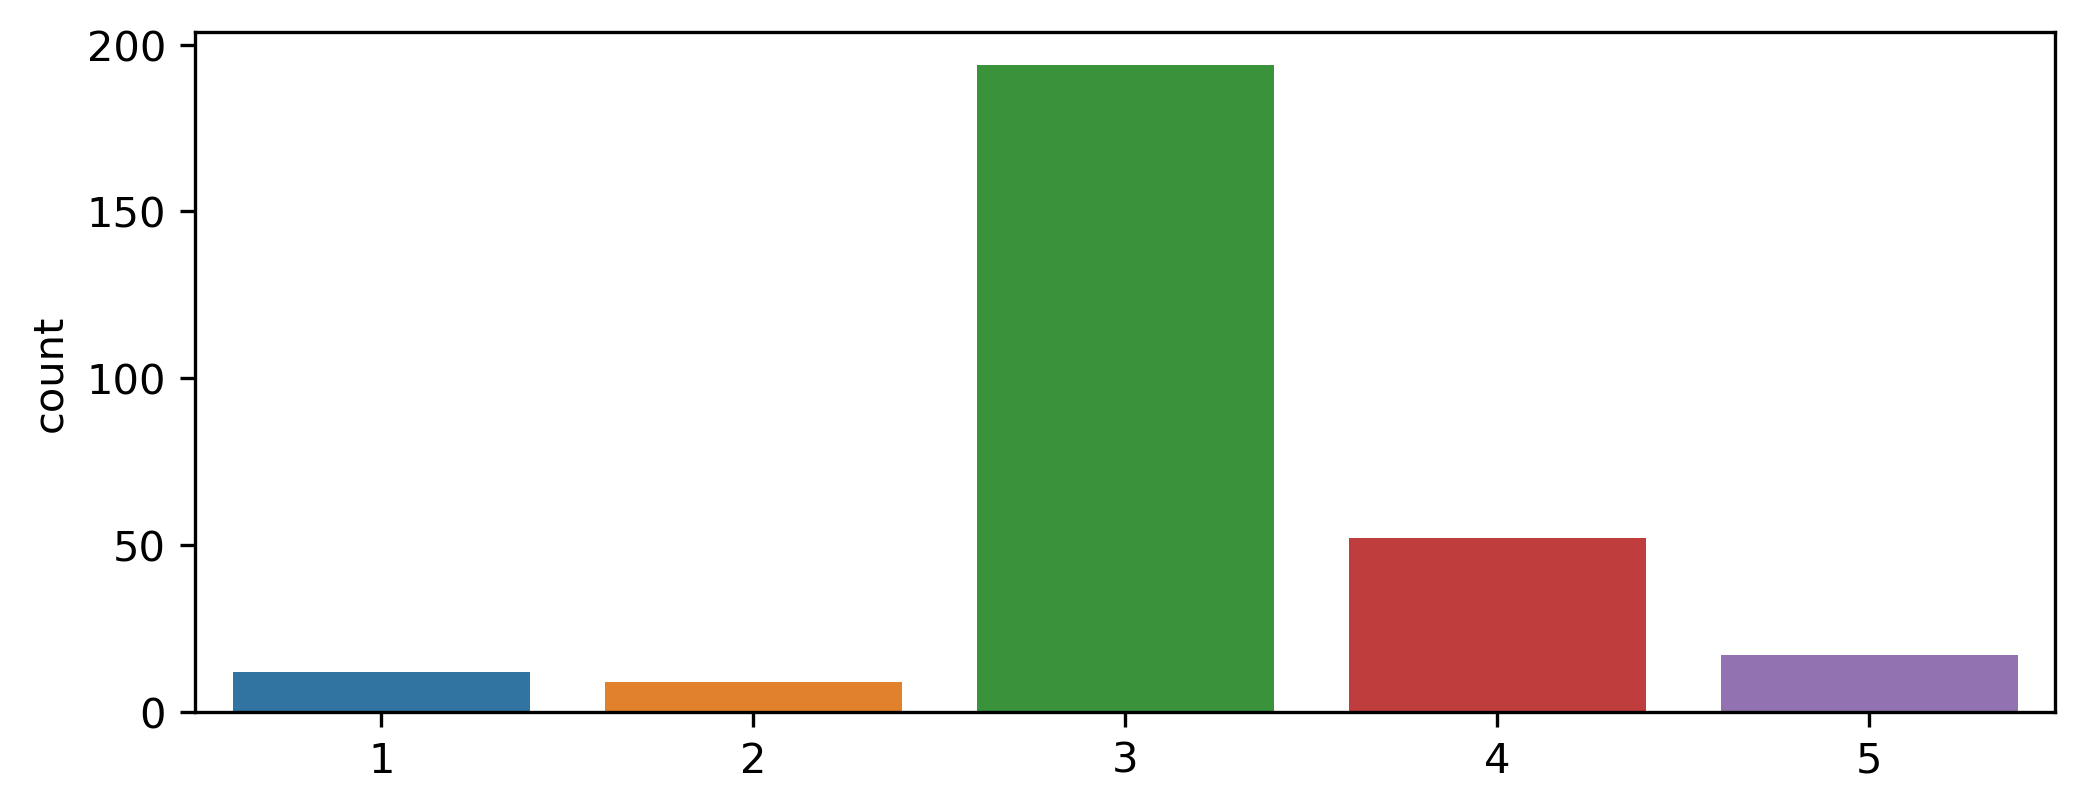

In [114]:
fig, ax = plt.subplots(1,1,figsize=(8, 3),dpi=300)
sns.countplot(x=y, ax = ax)#"ManualSevereType", data=pred_df, ax = ax, order=['Asymptomatic','Mild', 'Moderate', 'Severe', 'Critical'])


In [116]:
pred_df.to_csv('xgb_score_v284.dat', sep='\t', index=False)